# EDA and Data visualization


In [ ]:
import pandas as pd
import numpy as np
import klib 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
def scatt(X,Y):
    sns.scatterplot(x=X, y=Y, data=data, color='red')

    # Linear regression line
    sns.regplot(x=X, y=Y, data=data, scatter=False, color='black')

    # Annotating points  > 4500
    for i in range(data.shape[0]):
        if data[X].iloc[i] > 4500:
            plt.text(data[X].iloc[i], 
                    data[Y].iloc[i], 
                    str(data.index[i]))

    # Customizing y-axis
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
    plt.gca().set_yticks(np.arange(0, 800001, 100000))

    plt.xlabel(X)
    plt.ylabel(Y)
    plt.title(f'{Y} vs {X}')

    plt.show()


In [3]:
data = pd.read_csv('regression_dataset/train.csv')



In [4]:
data.head()

,Id,BuildingCategory,ZoningClassification,StreetLineLength,ParcelSize,RoadAccessType,AlleyAccessType,ParcelShape,TerrainFlatness,UtilityAvailability,...,PoolSize,PoolQuality,FenceQuality,AdditionalFeature,AdditionalFeatureValue,SaleMonth,SaleYear,SaleType,SaleCondition,OutcomeVariable
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1460 non-null   int64  
 1   BuildingCategory        1460 non-null   int64  
 2   ZoningClassification    1460 non-null   object 
 3   StreetLineLength        1201 non-null   float64
 4   ParcelSize              1460 non-null   int64  
 5   RoadAccessType          1460 non-null   object 
 6   AlleyAccessType         91 non-null     object 
 7   ParcelShape             1460 non-null   object 
 8   TerrainFlatness         1460 non-null   object 
 9   UtilityAvailability     1460 non-null   object 
 10  ParcelSettings          1460 non-null   object 
 11  TerrainSlope            1460 non-null   object 
 12  District                1460 non-null   object 
 13  RoadProximity1          1460 non-null   object 
 14  RoadProximity2          1460 non-null   

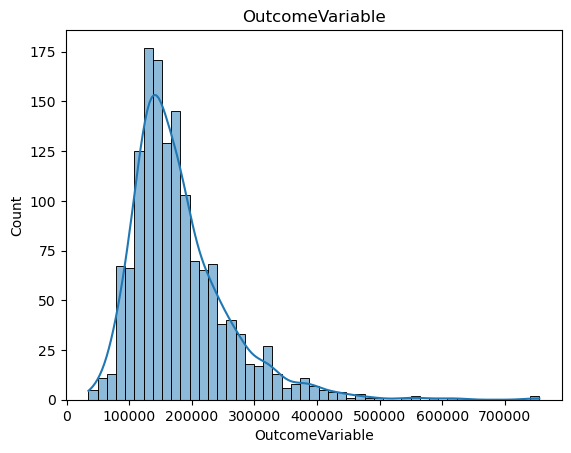

In [6]:
sns.histplot(data['OutcomeVariable'], kde=True)
plt.title('OutcomeVariable')
plt.show()

As we can see, the sale prices are right skewed. This was expected as few people can afford very expensive houses. We will keep this in mind, and take measures before modeling

In [7]:
data.describe()

,Id,BuildingCategory,StreetLineLength,ParcelSize,MaterialQuality,ConditionRating,ConstructionYear,RenovationYear,MasonrySize,BasementFinishedArea1,...,WoodDeckArea,OpenPorchArea,EnclosedPorchArea,ThreeSeasonPorchArea,ScreenPorchArea,PoolSize,AdditionalFeatureValue,SaleMonth,SaleYear,OutcomeVariable
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
data['BuildingCategory'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

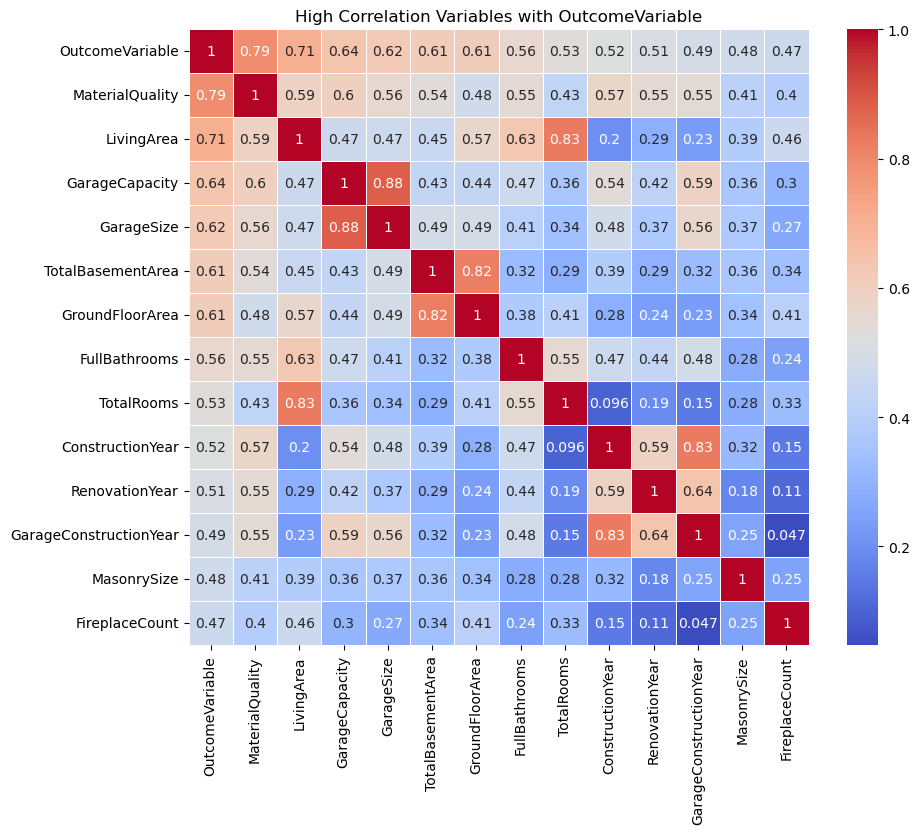

In [9]:
# Selecting numeric variables
numeric_vars = data.select_dtypes(include=[np.number])
numeric_var_names = numeric_vars.columns.tolist()

# Correlations of all numeric variables
cor_num_var = numeric_vars.corr()

# Sort on decreasing correlations with OutcomeVariable
cor_sorted = cor_num_var['OutcomeVariable'].abs().sort_values(ascending=False)

# Select only high correlations
cor_high = cor_sorted[cor_sorted > 0.4].index
cor_num_var_high = cor_num_var.loc[cor_high, cor_high]

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(cor_num_var_high, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('High Correlation Variables with OutcomeVariable')
plt.show()


We have 38 numerical variables in our dataset .Altogether, there are 10 numeric variables with a correlation of at least 0.5 with OutcomeVariable. All those correlations are positive. As from the correlation matrix plot, we can see that MaterialQuality, LivingArea, GarageCapacity are highly correlated with the OutcomeVariable. We have to keep in mind about multicollinearity. 
For example: the correlation between GarageCapacity and GarageSize is very high (0.89), and both have similar (high) correlations with OutcomeVariable.


## MaterialQuality

Overall Quality has the highest correlation with SalePrice among the numeric variables (0.79). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent).

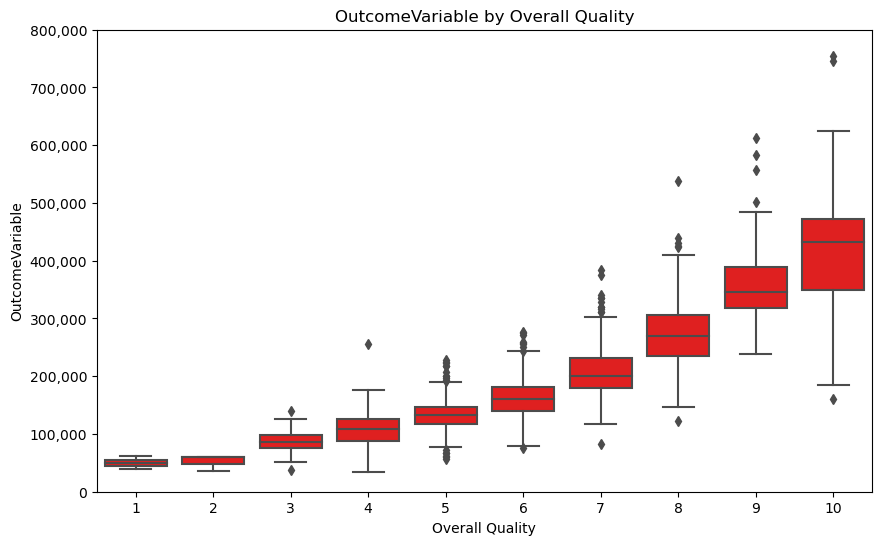

In [10]:
# Filter out rows where OutcomeVariable is NA
filtered_data = data[~data['OutcomeVariable'].isna()]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaterialQuality', y='OutcomeVariable', data=filtered_data, color='red')
plt.xlabel('Overall Quality')
plt.ylabel('OutcomeVariable')
plt.ylim(0, 800000)
plt.yticks(ticks=range(0, 800001, 100000), labels=['{:,}'.format(i) for i in range(0, 800001, 100000)])
plt.title('OutcomeVariable by Overall Quality')
plt.show()


The positive correlation is certainly there indeed, and seems to be a slightly upward curve. Regarding outliers, we do not see any extreme values. If there is a candidate to take out as an outlier later on, it seems to be the expensive house with grade 4.

## LivingArea

The numeric variable with the second highest correlation with OutcomeVariable is the LivingArea . This make a lot of sense big houses are generally more expensive.

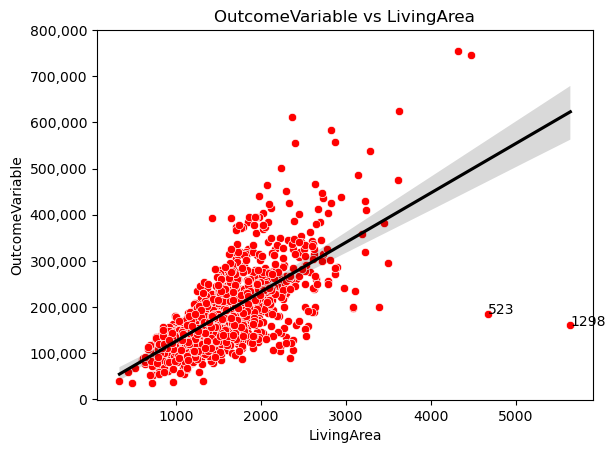

In [11]:
scatt('LivingArea','OutcomeVariable')

Especially the two houses with really big living areas and low OutcomeVariable seem outliers (houses 523 and 1298, see labels in graph). we will not take them out yet, as taking outliers can be dangerous. For instance, a low score on the MaterialQuality could explain a low price. However, as we can see below, these two houses actually also score maximum points on Matierial Quality. Therefore, we will keep houses 1298 and 523 in mind as prime candidates to take out as outliers.

In [12]:
a_outlr = data.loc[[523, 1298], ['OutcomeVariable', 'LivingArea', 'MaterialQuality']]
print(a_outlr)


      OutcomeVariable  LivingArea  MaterialQuality
523            184750        4676               10
1298           160000        5642               10


## GarageCapacity

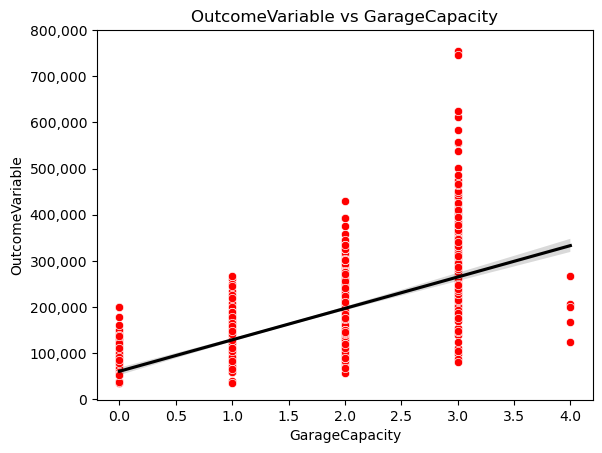

In [13]:

scatt('GarageCapacity','OutcomeVariable')

As we can see, if there in no garage for cars then the price is low. With the increase of GarageCapicity, Outcomevariable increases.

# Missing data, feature engineer

We are going to fix the 34 predictors that have missing values in this area. We will go over them one by one, starting with the most common NAs and working our way down until we’ve repaired them all. If we come across a variable that is part of a group with other variables, we shall treat them as a unit. Pool, Garage, and Basement, for example, each have a number of variations.

We turned character variables into ordinal integers if there is evident ordinality, or into factors if levels are categories without ordinality, in addition to ensuring that NAs are handled. We’ll use one-hot encoding to transform these factors to numbers later (using the model.matrix function).

## BuildingCategory

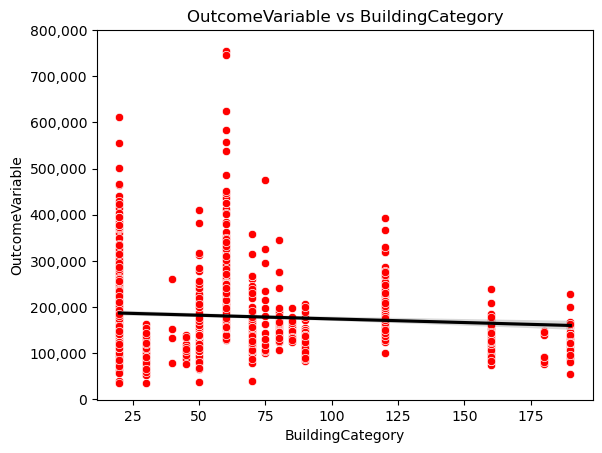

In [14]:
x='BuildingCategory'
y='OutcomeVariable'
scatt(x,y)

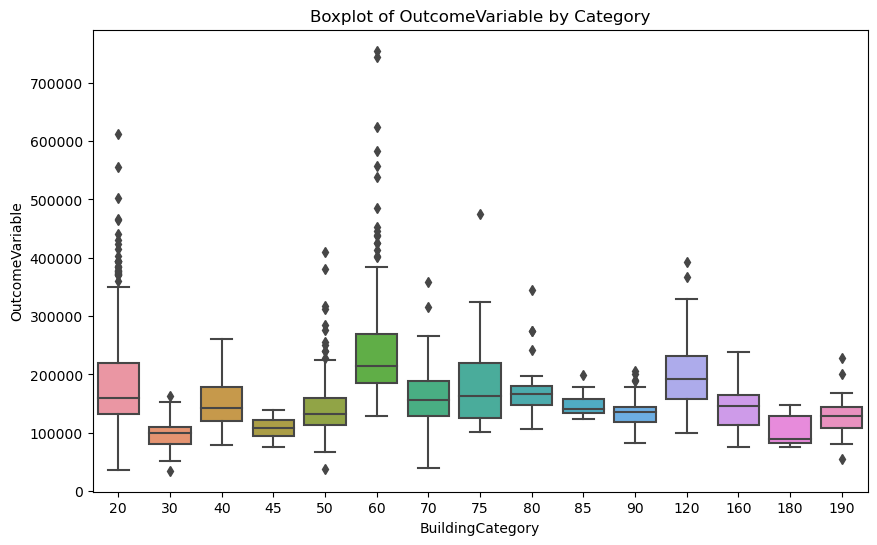

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BuildingCategory', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

In [16]:
building_category_mapping = {
    60: 'A',
    20: 'B',
    70: 'C',
    50: 'D',
    190: 'E',
    45: 'F',
    90: 'G',
    120: 'H',
    30: 'I',
    85: 'J',
    80: 'K',
    160: 'L',
    75: 'M',
    180: 'N',
    40: 'O'
}
# Apply the mapping
data['BuildingCategory'] = data['BuildingCategory'].map(building_category_mapping)


We found that BuildingCategory negatively impacts the performance of the model due to misleading ordinal implications,so we can convert it to categorical data .
By doing this we have removed the unintended ordinal relationship.

## StreetLineLength

259 NAs. The most reasonable imputation seems to take the median per District.

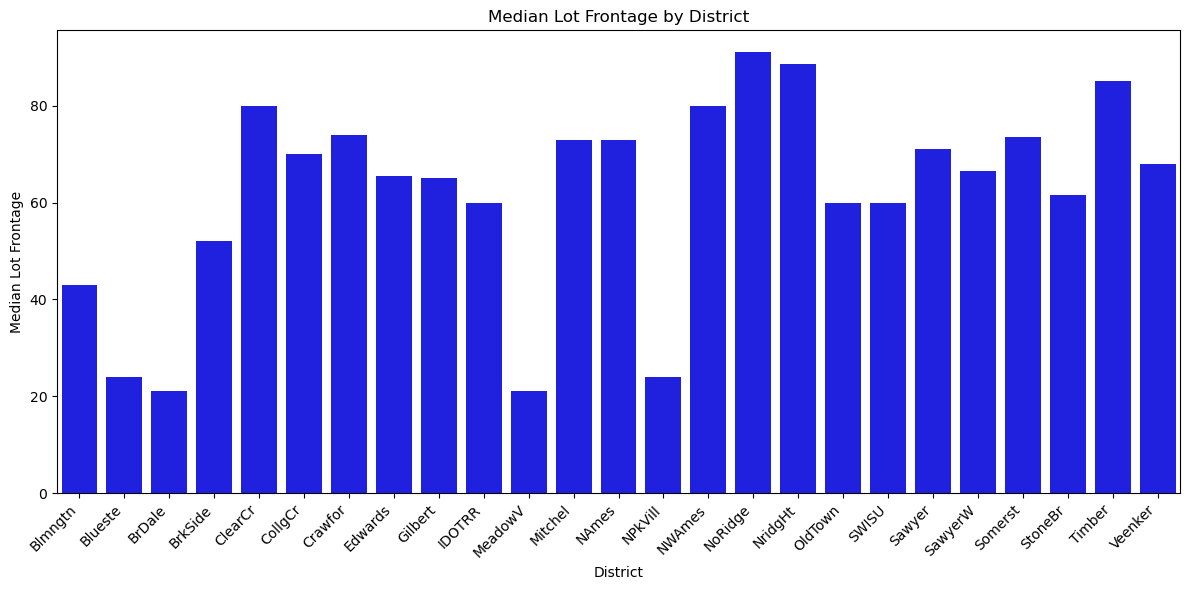

In [17]:
df_filtered = data.dropna(subset=['StreetLineLength'])

# Calculate median StreetLineLength for each District
median_street_length = df_filtered.groupby('District')['StreetLineLength'].median().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='StreetLineLength', data=median_street_length, color='blue')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Add labels and title if necessary
plt.xlabel('District')
plt.ylabel('Median Lot Frontage')
plt.title('Median Lot Frontage by District')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
median_street_length = data.groupby('District')['StreetLineLength'].transform('median')
# Fill NaN values in the StreetLineLength column with the corresponding district median
data['StreetLineLength'] = data['StreetLineLength'].fillna(median_street_length)

## AlleyAccessType

the values are not ordinal

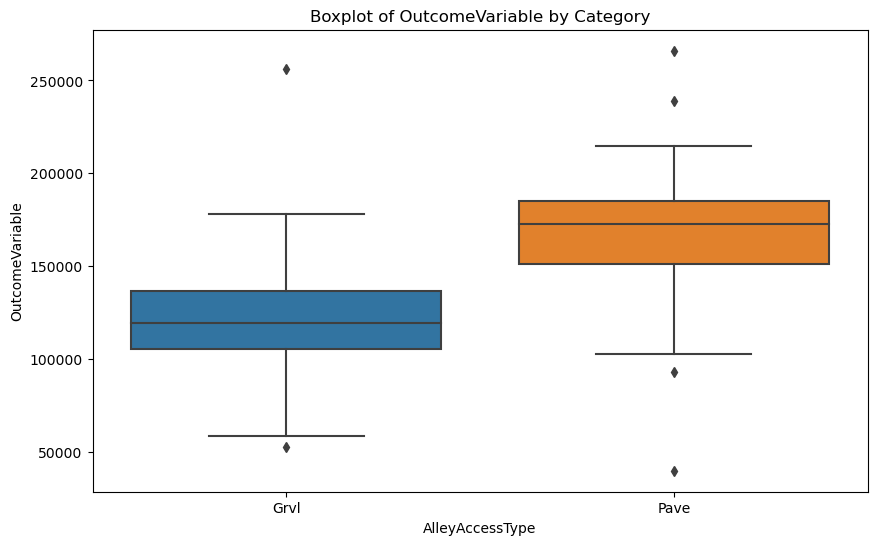

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AlleyAccessType', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

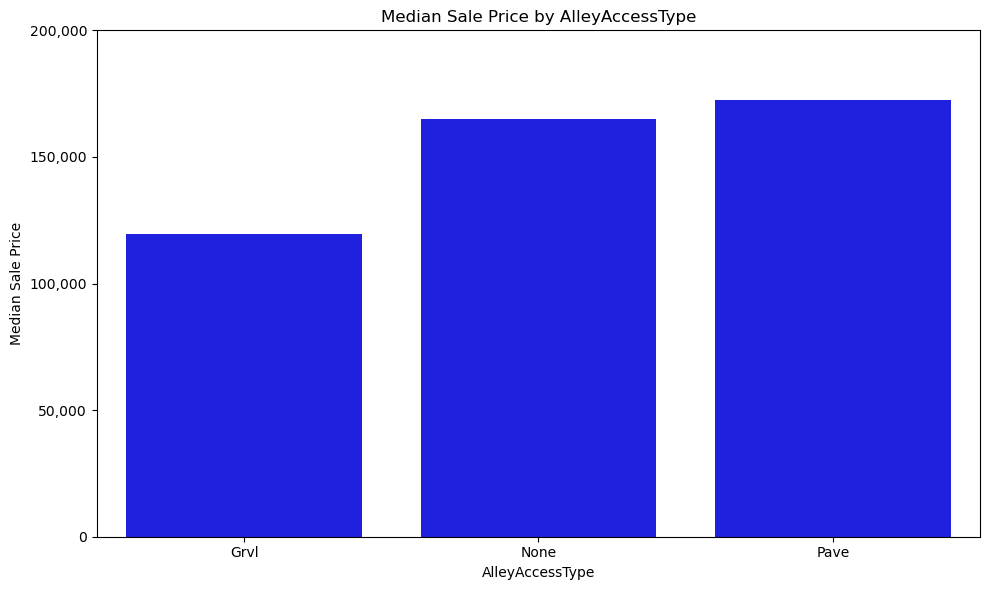

In [20]:
from matplotlib.ticker import FuncFormatter

data['AlleyAccessType'] = data['AlleyAccessType'].fillna('None').astype('category')

# Filter out rows where OutcomeVariable is NaN
data_filtered = data.dropna(subset=['OutcomeVariable'])

# Calculate median OutcomeVariable for each AlleyAccessType category
median_sale_price_by_AlleyAccessType = data_filtered.groupby('AlleyAccessType')['OutcomeVariable'].median().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AlleyAccessType', y='OutcomeVariable', data=median_sale_price_by_AlleyAccessType, color='blue')

# Customize y-axis to show breaks at 0, 50000, 100000, 150000, 200000
plt.yticks(ticks=range(0, 200001, 50000))

# Add labels and title if necessary
plt.xlabel('AlleyAccessType')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price by AlleyAccessType')

# Function to format y-axis labels with commas
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.show()

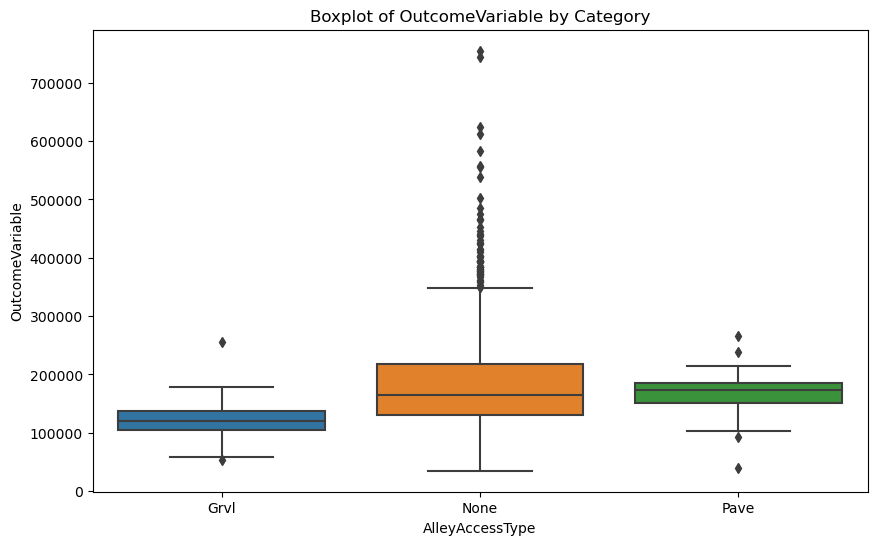

In [21]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AlleyAccessType', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

## MasonrySize

we have noticed that when th Masonrytype is equal to zero the masonry size is nan

In [27]:
h=data[['MasonryType', 'MasonrySize']]
h=h[h['MasonryType'].isna()]

In [29]:
h

,MasonryType,MasonrySize
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


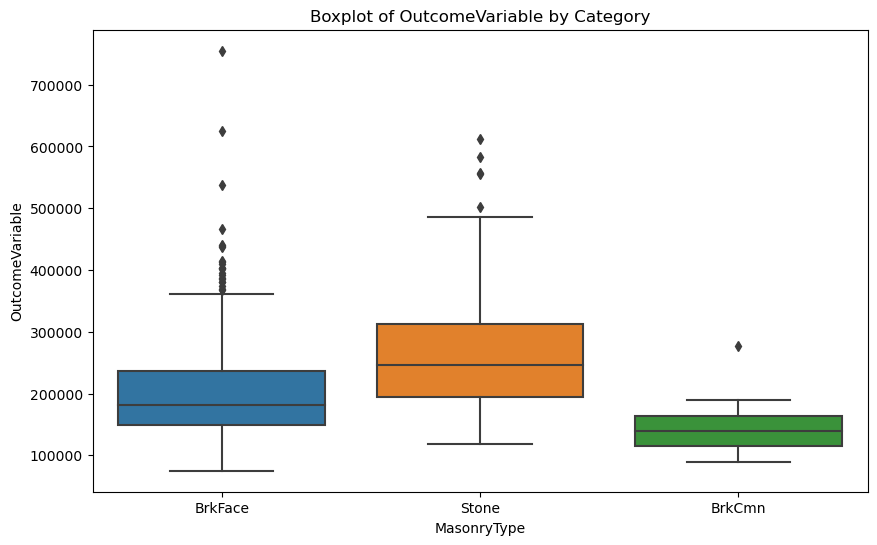

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='MasonryType', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

we do not notice any ordinal relationship

In [ ]:
# Fill NaN values in MasonryType with 'None' where MasonrySize is 0.0
data.loc[(data['MasonrySize'] == 0.0) & (data['MasonryType'].isna()), 'MasonryType'] = 'None'

still some nan in both so we fill it with mean and median

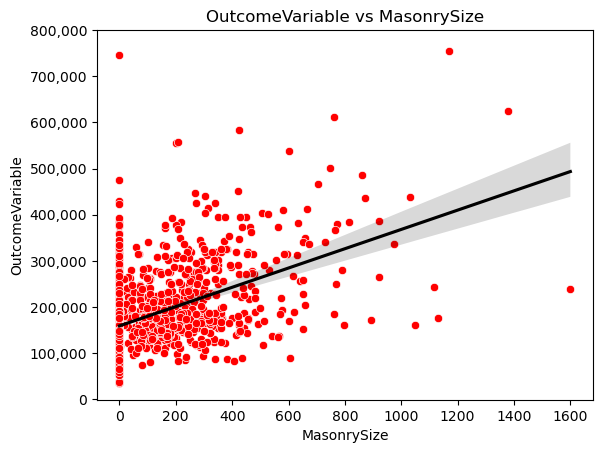

In [ ]:
scatt('MasonrySize','OutcomeVariable')

## Basement columns

We have noticed that if the TotalBasementArea is 0 than there is no basment in the house

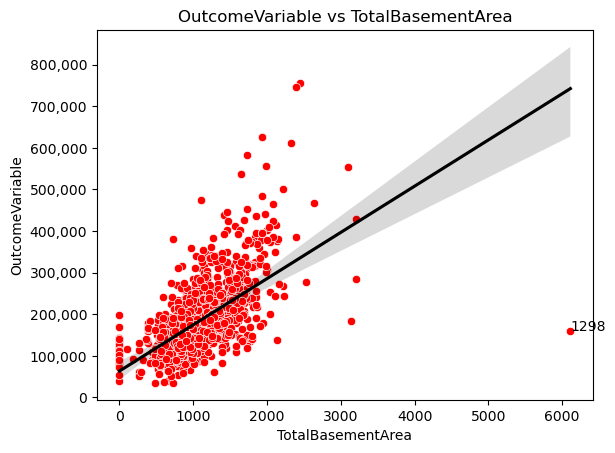

In [ ]:
scatt('TotalBasementArea','OutcomeVariable')

the house with really big bassment area and low OutcomeVariable seem outliers (house 1298, see labels in graph). 
we will not take them out yet, as taking outliers can be dangerous. For instance, a low score on the MaterialQuality could explain a low price. However, as we can see below, this house actually also score maximum points on Material Quality (6). Therefore, we will keep the house 1298 in mind as prime candidates to take out as outliers.

In [ ]:
columns_to_fill = {
    'BasementHeight': 'NA',
    'BasementCondition': 'NA',
    'BasementAccess': 'NA',
    'BasementFinish1': 'NA',
    'BasementFinishedArea1': 0.0,
    'BasementFinish2': 'NA'
}

# Fill the missing values for rows where TotalBasementArea is 0
for column, value in columns_to_fill.items():
    data.loc[data['TotalBasementArea'] == 0, column] = value

In [ ]:
columns_to_fill_mode = ['BasementAccess', 'BasementFinish2']

for column in columns_to_fill_mode:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

we have decided two add up the two column into one

In [ ]:
data['BasementBathrooms']=data['BasementFullBathrooms'] + data['BasementHalfBathrooms']

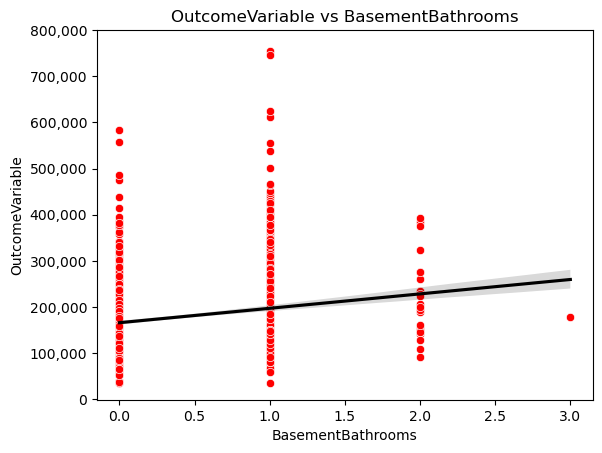

In [ ]:
scatt('BasementBathrooms','OutcomeVariable')

there may be some sort of ordinal relationship , we may consider it we may not

## PoolQuality PoolSize

The PoolQC is the variable with most NAs (1453) 

In [32]:
h=data[['PoolQuality', 'PoolSize']]
h=h[h['PoolQuality'].isna()]

In [33]:
h

,PoolQuality,PoolSize
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
1455,NaN,0
1456,NaN,0
1457,NaN,0
1458,NaN,0


when size is 0 the quality is alo nan , which make sence not every house have pool in it , but when it have the pricr shoots .
it is obvious that we need to just assign ‘No Pool’ to the NAs.

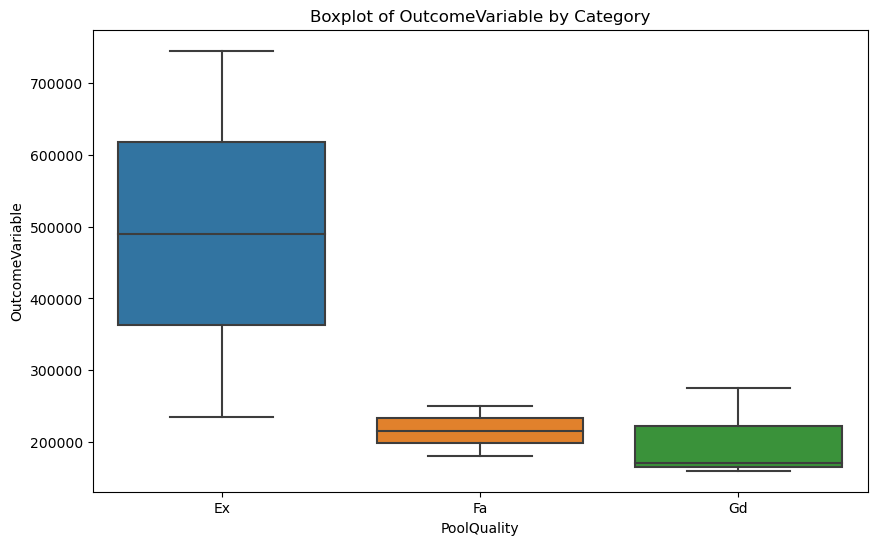

In [35]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='PoolQuality', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

we notice some kinde of ordialaty 

notice we thought of an approach as follows : if we label quality ordinaly and multiply it wit the size in deffrent column we may have better performance 

## FenceQuality

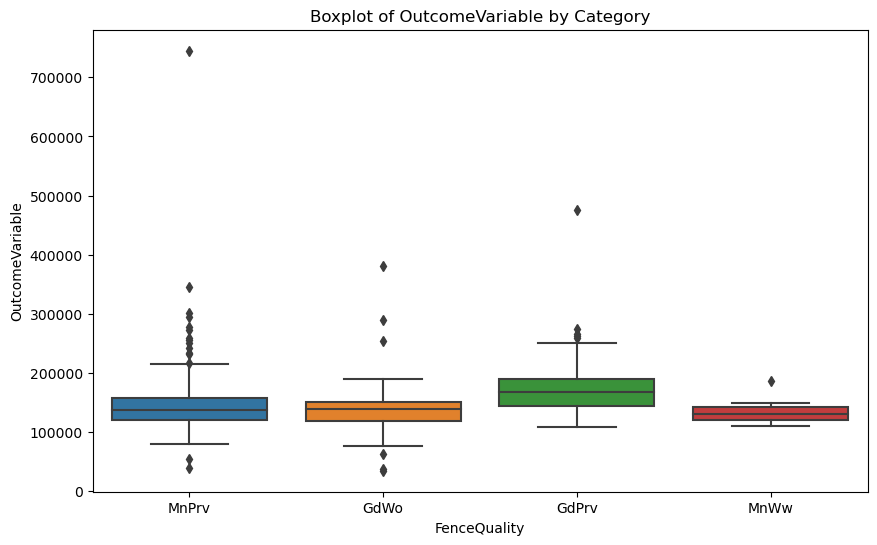

In [36]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='FenceQuality', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

we may drop this column since it does not indicates any thing

## Fireplace variables

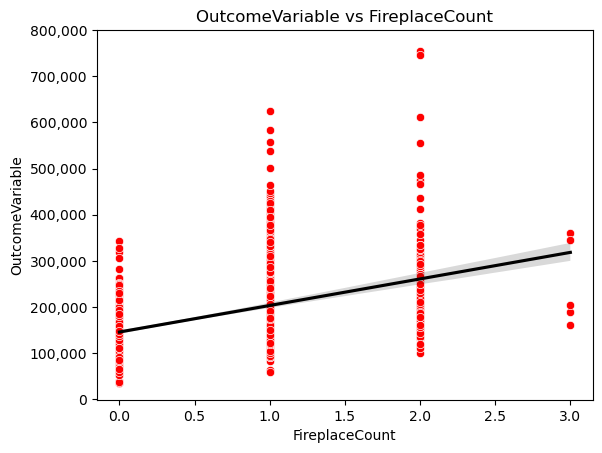

In [40]:
scatt('FireplaceCount','OutcomeVariable')

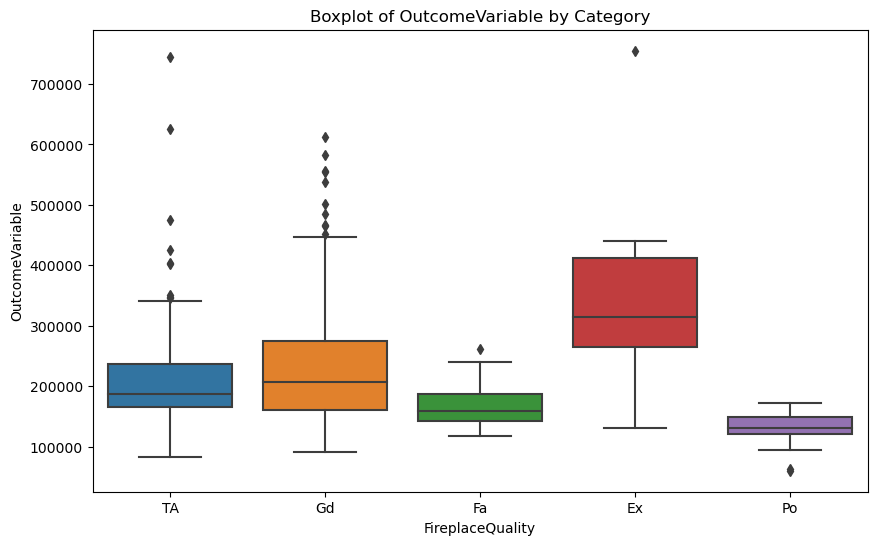

In [41]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='FireplaceQuality', y='OutcomeVariable', data=data)
plt.title('Boxplot of OutcomeVariable by Category')
plt.show()

ordinal

In [42]:
h=data[['FireplaceCount', 'FireplaceQuality']]
h=h[h['FireplaceCount'] == 0]

In [43]:
h

,FireplaceCount,FireplaceQuality
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


## Garage variables

We have noticed that if the GarageSize is 0 than there is no garage in the property

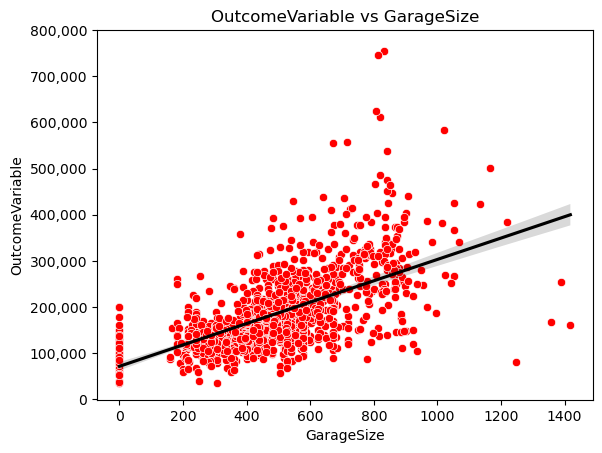

In [45]:
scatt('GarageSize','OutcomeVariable')

## sale year constraction year sale month

we will drop month since it helps nothing 

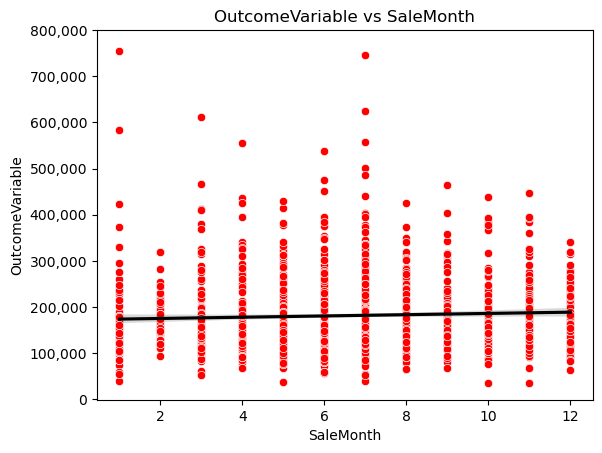

In [50]:
scatt('SaleMonth','OutcomeVariable')

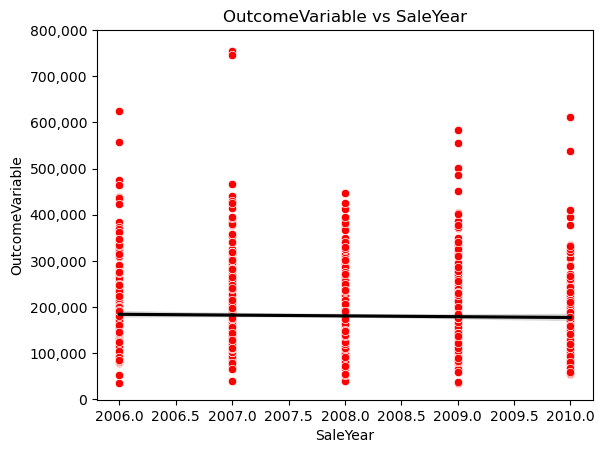

In [51]:
scatt('SaleYear','OutcomeVariable')

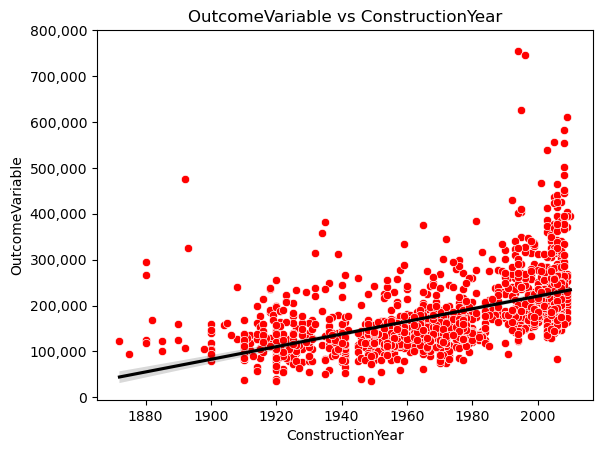

In [52]:
scatt('ConstructionYear','OutcomeVariable')

we thought of substracting SaleYear and ConstructionYear in new column called house age

In [53]:
data['age'] = data['SaleYear'] - data['ConstructionYear'] 

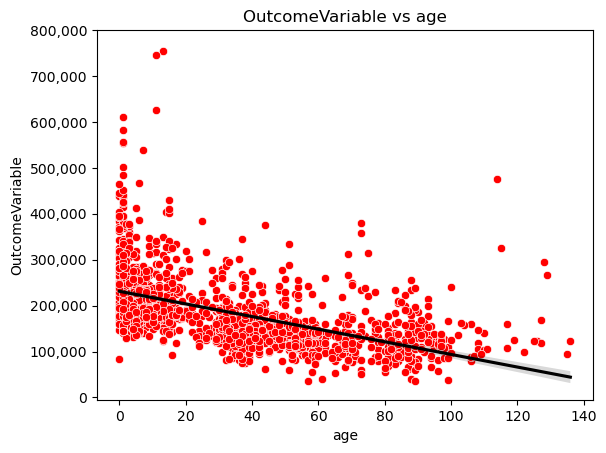

In [54]:
scatt('age','OutcomeVariable')

seams to be a vaild approach , some outlayers here and there but we can deal with them later

# Columns Dropped

we noticed a strong correlation between "GarageConstructionYear" and "ConstructionYear" so we opted to leave the more meaningful attribute in our features

we also did a groupby['AdditionalFeature' , 'AdditionalFeatureValue'] and noticed there's little to no relation with heavy arbitrary values so we opted to remove the 'AdditionalFeatureValue'

# Performing outliers detection

In [3]:
df = pd.read_csv('train.csv')

In [4]:
# Calculate the 4th and 96th percentiles
Q1 = df.quantile(0.04)
Q3 = df.quantile(0.96)
IQR = Q3 - Q1

# Define the bounds for outliers
max_value = Q3 + 1.5 * IQR  # Upper bound for outliers
min_value = Q1 - 1.5 * IQR  # Lower bound for outliers

# Detect outliers
outliers_mask = (df < min_value) | (df > max_value)

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers_mask.any(axis=1)].reset_index(drop=True)

# Count the total number of outliers for each variable
total_outliers = outliers_mask.sum()

# Display results
print("Total outliers for each variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())


Total outliers for each variable:
AdditionalFeature          0
AdditionalFeatureValue    52
AirConditioning            0
AlleyAccessType            0
BasementAccess             0
                          ..
TotalRooms                 0
UpperFloorArea             0
UtilityAvailability        0
WoodDeckArea               0
ZoningClassification       0
Length: 81, dtype: int64
Total outliers: 140


C:\Users\Omar\AppData\Local\Temp\ipykernel_2312\800733754.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = (df < min_value) | (df > max_value)


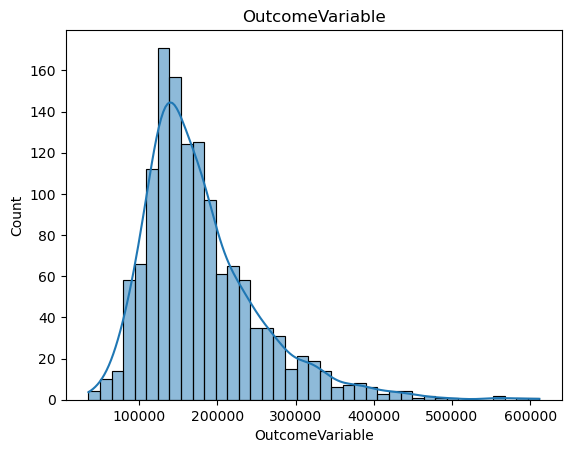

In [5]:
sns.histplot(df_no_outliers['OutcomeVariable'], kde=True)
plt.title('OutcomeVariable')
plt.show()

# PipeLine and Model Training

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        df = df.drop(columns=['Id', 'GarageConstructionYear', 'SaleMonth', 'FenceQuality', 'AdditionalFeatureValue', 'AdditionalFeature'])

        building_category_mapping = {60: 'A', 20: 'B', 70: 'C', 50: 'D', 190: 'E', 45: 'F', 90: 'G',
                                     120: 'H', 30: 'I', 85: 'J', 80: 'K', 160: 'L', 75: 'M', 180: 'N', 40: 'O'}
        df['BuildingCategory'] = df['BuildingCategory'].map(building_category_mapping)

        median_street_length = df.groupby('District')['StreetLineLength'].transform('median')
        df['StreetLineLength'] = df['StreetLineLength'].fillna(median_street_length)
        df['AlleyAccessType'] = df['AlleyAccessType'].fillna('None').astype('category')
        df['MasonrySize'] = df['MasonrySize'].fillna(0)
        df['MasonryType'] = np.where(df['MasonrySize'] == 0, 'Na', df['MasonryType'])

        basement_cols = ['BasementHeight', 'BasementCondition', 'BasementAccess', 'BasementFinish1',
                         'BasementFinishedArea1', 'BasementFinish2', 'BasementFinishedArea2', 'BasementUnfinishedArea']
        df.loc[df['TotalBasementArea'] == 0, basement_cols] = df.loc[df['TotalBasementArea'] == 0, basement_cols].fillna(
            {'BasementHeight': 'Na', 'BasementCondition': 'Na', 'BasementAccess': 'Na', 'BasementFinish1': 'Na',
             'BasementFinishedArea1': 0, 'BasementFinish2': 'Na', 'BasementFinishedArea2': 0, 'BasementUnfinishedArea': 0})

        garage_cols = ['GarageInterior', 'GarageLocation', 'GarageQuality', 'GarageCondition']
        df.loc[df['GarageSize'] == 0, garage_cols] = df.loc[df['GarageSize'] == 0, garage_cols].fillna(
            {'GarageInterior': 'Na', 'GarageLocation': 'Na', 'GarageQuality': 'Na', 'GarageCondition': 'Na'})

        df['PoolQuality'] = np.where(df['PoolSize'] == 0, 'Na', df['PoolQuality'])
        df['FireplaceQuality'] = np.where(df['FireplaceCount'] == 0, 'Na', df['FireplaceQuality'])
    

        df['TotalBasementBathrooms'] = df['BasementFullBathrooms'] + df['BasementHalfBathrooms']
        df = df.drop(columns=['BasementFullBathrooms', 'BasementHalfBathrooms'])

        df['TotalBathrooms'] = df['FullBathrooms'] + df['HalfBathrooms']
        df = df.drop(columns=['FullBathrooms', 'HalfBathrooms'])

        df['PropertyAge'] = df['SaleYear'] - df['ConstructionYear']
        df['RenovationTime'] = df['SaleYear'] - df['RenovationYear']
        df = df.drop(columns=['SaleYear', 'ConstructionYear', 'RenovationYear'])

        return df

categorical_features = [
    'BuildingCategory', 'ZoningClassification', 'RoadAccessType', 'AlleyAccessType', 'ParcelShape',
    'TerrainFlatness', 'UtilityAvailability', 'ParcelSettings', 'District', 'RoadProximity1',
    'RoadProximity2', 'DwellingType', 'DwellingStyle', 'RoofType', 'RoofMaterial', 'ExteriorCladding1',
    'ExteriorCladding2', 'MasonryType', 'ExteriorQuality', 'ExteriorCondition', 'FoundationType',
    'BasementHeight', 'BasementCondition', 'BasementAccess', 'BasementFinish1', 'BasementFinish2',
    'HeatingType', 'HeatingQuality', 'AirConditioning', 'ElectricalSystem', 'KitchenQuality',
    'FunctionalityRating', 'FireplaceQuality', 'GarageLocation', 'GarageInterior', 'GarageQuality',
    'GarageCondition', 'DrivewayType', 'PoolQuality', 'SaleType', 'SaleCondition'
]
ordinal_columns = [
    'TerrainSlope', 'KitchenQuality', 'ExteriorQuality', 'HeatingQuality',
    'FunctionalityRating', 'FireplaceQuality', 'ExteriorCondition',
    'BasementHeight', 'BasementCondition', 'GarageQuality', 'GarageCondition',
    'PoolQuality'
]

numerical_features = [
    'StreetLineLength', 'ParcelSize', 'MaterialQuality', 'ConditionRating', 'RenovationTime',
    'MasonrySize', 'BasementFinishedArea1', 'BasementFinishedArea2', 'BasementUnfinishedArea',
    'TotalBasementArea', 'GroundFloorArea', 'UpperFloorArea', 'LowQualityArea', 'LivingArea',
    'TotalBasementBathrooms', 'TotalBathrooms', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalRooms',
    'FireplaceCount', 'GarageCapacity', 'GarageSize', 'WoodDeckArea', 'OpenPorchArea', 'EnclosedPorchArea',
    'ThreeSeasonPorchArea', 'ScreenPorchArea', 'PoolSize', 'PropertyAge'
]

ordinal_mapping = {
    'TerrainSlope': ['Sev', 'Mod', 'Gtl'],
    'KitchenQuality': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExteriorQuality': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQuality': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FunctionalityRating': ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min1', 'Min2', 'Typ'],
    'FireplaceQuality': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExteriorCondition': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BasementHeight': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BasementCondition': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQuality': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCondition': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQuality': ['Na', 'Fa', 'Gd', 'Ex'],
}


# Create imputers for categorical and numerical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

# Create pipelines for each type of feature
numerical_pipeline = Pipeline([
    ('imputer', numerical_imputer),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', categorical_imputer),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('imputer', categorical_imputer),
    ('encoder', OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_columns]))
])

# ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, [col for col in categorical_features if col not in ordinal_columns]),
        ('ord', ordinal_pipeline, ordinal_columns)
    ])

# Full pipeline
pipeline = Pipeline(steps=[
    ('custom', CustomTransformer()),
    ('preprocessor', preprocessor)
])

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

X = df.drop('OutcomeVariable', axis=1)
y = df['OutcomeVariable'].copy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Process train and test sets separately
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [42]:
X_processed = pipeline.fit_transform(X)

## LinearRegression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression
base_model = LinearRegression()
base_model.fit(X_train_processed, y_train)
y_pred_base = base_model.predict(X_test_processed)
print("Base Model R2 Score:", r2_score(y_test, y_pred_base))
print("Base Model RMSE Score:", mean_squared_error(y_test, y_pred_base, squared=False))

Base Model R2 Score: 0.8837259211174341
Base Model RMSE Score: 29864.027097320424


## Ridge

In [ ]:
from sklearn.linear_model import Ridge

# Train Ridge Regression
r = Ridge()
r.fit(X_train_processed, y_train)
y_pred = r.predict(X_test_processed)
current_r2_score = r2_score(y_test, y_pred)

print("Ridge R2 Score:", current_r2_score)

Ridge R2 Score: 0.8831355558883749


## Lasso

In [ ]:
from sklearn.linear_model import Lasso

# Train Lasso Regression
l = Lasso()
l.fit(X_train_processed, y_train)
y_pred = r.predict(X_test_processed)
current_r2_score = r2_score(y_test, y_pred)

print("Lasso R2 Score:", current_r2_score)

Lasso R2 Score: 0.8831355558883749


C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48549645607.29712, tolerance: 696659484.3571945
  model = cd_fast.sparse_enet_coordinate_descent(


## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the RandomForestRegressor
tree_reg = DecisionTreeRegressor(random_state= 42)

# Fit the model to the training data
tree_reg.fit(X_train_processed, y_train)

# Predict the target variable on the test set
y_pred = tree_reg.predict(X_test_processed)

# Compute RMSE and R2 scores
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Random Forest RMSE:", rmse)
print("Random Forest R2 Score:", r2)

Random Forest RMSE: 34185.51046095447
Random Forest R2 Score: 0.8476402314700777


## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
forest_reg.fit(X_train_processed, y_train)

# Predict the target variable on the test set
y_pred = forest_reg.predict(X_test_processed)

# Compute RMSE and R2 scores
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Random Forest RMSE:", rmse)
print("Random Forest R2 Score:", r2)

Random Forest RMSE: 28311.93151457296
Random Forest R2 Score: 0.8954978648320329


## RandomForestRegressor w CrossVal

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation with R-squared scoring
forest_scores = cross_val_score(forest_reg, X_processed, y, scoring='r2', cv=10)

# Print the scores
print("Cross-validated R-squared scores:", forest_scores)
print("Mean R-squared:", forest_scores.mean())
print("Standard deviation of R-squared:", forest_scores.std())

Cross-validated R-squared scores: [0.86403803 0.89211303 0.92036809 0.77215807 0.88166662 0.88707923
 0.88732046 0.88372802 0.80909046 0.85875455]
Mean R-squared: 0.865631656695653
Standard deviation of R-squared: 0.04146853400660071


## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# Parameters provided
params = {
    'svr__C': 100,
    'svr__degree': 2,
    'svr__epsilon': 1,
    'svr__gamma': 'scale',
    'svr__kernel': 'linear'
}

# Create the SVR model
svr = SVR(C=params['svr__C'],
          degree=params['svr__degree'],
          epsilon=params['svr__epsilon'],
          gamma=params['svr__gamma'],
          kernel=params['svr__kernel'])

# Alternatively, if not using a pipeline, just use the SVR instance directly
svr.fit(X_train_processed, y_train)


# Make predictions
y_pred = svr.predict(X_test_processed)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 35450.152820756455
R²: 0.8361590757590672


## GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regression
model = GradientBoostingRegressor()
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
current_r2_score = r2_score(y_test, y_pred)

# Compute RMSE and R2 scores
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Best Model RMSE:", rmse)
print("Best Model R2 Score:", r2)

Best Model RMSE: 26400.46011609426
Best Model R2 Score: 0.9091323790520921


## xgboost with HP Tuning

In [48]:
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the search spaces for hyperparameters
search_spaces = {
    'max_depth': (3, 15),
    'n_estimators': (50, 500),
    'learning_rate': (0.01, 0.5, 'log-uniform'),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

# Initialize the XGBoost regressor
xgb_reg = XGBRegressor(random_state=42)

# Perform Bayesian hyperparameter optimization
bayes_search = BayesSearchCV(xgb_reg, search_spaces, n_iter=100, cv=None, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
bayes_search.fit(X_train_processed, y_train)

# Get the best model from the search
best_xgb_reg = bayes_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_xgb_reg.predict(X_test_processed)

# Compute RMSE and R2 scores
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Best Model Parameters:", best_xgb_reg.get_params())
print("Best Model RMSE:", rmse)
print("Best Model R2 Score:", r2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [50]:
best_params = best_xgb_reg.get_params()
new_xgb_reg = XGBRegressor(**best_params)

new_xgb_reg.fit(X_processed, y)

y_pred = new_xgb_reg.predict(X_processed)

rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print("Best Model RMSE:", rmse)
print("Best Model R2 Score:", r2)

Best Model RMSE: 10773.78556777796
Best Model R2 Score: 0.981595315287704


In [51]:
import joblib

# Assuming best_svr is the best model you want to save
joblib.dump(new_xgb_reg, 'final_best_xgb_reg_bsht_hw.pkl')

['final_best_xgb_reg_bsht_hw.pkl']

In [4]:
results = pd.DataFrame(columns=['Model', 'R2', 'Improvement', 'Reason'])

# Function to add a row to the DataFrame
def add_result(model_name, r2, improvement, reason):
    global results  # Ensure we're modifying the global DataFrame
    new_row = {
        'Model': model_name,
        'R2': r2,
        'Improvement': improvement,
        'Reason': reason
    }
    results = results.append(new_row, ignore_index=True)

# Example usage of the function
add_result('LinearRegression', 0.8837, 'No', 'Establishing a baseline with a simple, interpretable model')
add_result('Ridge', 0.8831, 'No', 'Evaluating regularization to prevent overfitting in linear models')
add_result('Lasso', 0.8831, 'No', 'Testing feature selection capabilities via regularization')
add_result('DecisionTreeRegressor', 0.8476, 'No', 'Exploring non-linear relationships with a simple tree model')
add_result('RandomForestRegressor', 0.8954, 'Yes', 'Improving performance using ensemble learning with multiple trees')
add_result('RandomForestRegressor w CrossVal', 0.8656, 'No', 'a Assessing model stability and performance with cross-validation')
add_result('SVR', 0.8361, 'No', 'Investigating the performance of Support Vector Regression for non-linear data')
add_result('GradientBoostingRegressor', 0.9091, 'Yes', 'Enhancing prediction accuracy with gradient boosting technique')
add_result('xgboost with HP Tuning', 0.9262, 'Yes', 'Optimizing performance with a powerful gradient boosting ensemble method')

C:\Users\Omar\AppData\Local\Temp\ipykernel_19956\3804388516.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
C:\Users\Omar\AppData\Local\Temp\ipykernel_19956\3804388516.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
C:\Users\Omar\AppData\Local\Temp\ipykernel_19956\3804388516.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
C:\Users\Omar\AppData\Local\Temp\ipykernel_19956\3804388516.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row,

In [5]:
results

,Model,R2,Improvement,Reason
0,LinearRegression,0.8837,No,"Establishing a baseline with a simple, interpr..."
1,Ridge,0.8831,No,Evaluating regularization to prevent overfitti...
2,Lasso,0.8831,No,Testing feature selection capabilities via reg...
3,DecisionTreeRegressor,0.8476,No,Exploring non-linear relationships with a simp...
4,RandomForestRegressor,0.8954,Yes,Improving performance using ensemble learning ...
5,RandomForestRegressor w CrossVal,0.8656,No,a Assessing model stability and performance wi...
6,SVR,0.8361,No,Investigating the performance of Support Vecto...
7,GradientBoostingRegressor,0.9091,Yes,Enhancing prediction accuracy with gradient bo...
8,xgboost with HP Tuning,0.9262,Yes,Optimizing performance with a powerful gradien...


# Test

In [52]:
test = pd.read_csv('test.csv')

In [57]:
ID=test['Id']
ID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [58]:
X_test_transformed = pipeline.transform(test)

In [59]:
test_predictions = new_xgb_reg.predict(X_test_transformed)

In [60]:
data={'ID':ID,'SalePrice':test_predictions}
sub=pd.DataFrame(data)
sub.to_csv('sub.csv',index=False)

In [61]:
pd.read_csv('sub.csv')

,ID,SalePrice
0,1461,122618.860
1,1462,171609.770
2,1463,179532.980
3,1464,186192.840
4,1465,179937.550
...,...,...
1454,2915,80483.200
1455,2916,78083.170
1456,2917,168832.110
1457,2918,126029.195


# Finale Pipeline with model

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        df = df.drop(columns=['Id', 'GarageConstructionYear', 'SaleMonth', 'FenceQuality', 'AdditionalFeatureValue', 'AdditionalFeature'])

        building_category_mapping = {60: 'A', 20: 'B', 70: 'C', 50: 'D', 190: 'E', 45: 'F', 90: 'G',
                                     120: 'H', 30: 'I', 85: 'J', 80: 'K', 160: 'L', 75: 'M', 180: 'N', 40: 'O'}
        df['BuildingCategory'] = df['BuildingCategory'].map(building_category_mapping)

        median_street_length = df.groupby('District')['StreetLineLength'].transform('median')
        df['StreetLineLength'] = df['StreetLineLength'].fillna(median_street_length)
        df['AlleyAccessType'] = df['AlleyAccessType'].fillna('None').astype('category')
        df['MasonrySize'] = df['MasonrySize'].fillna(0)
        df['MasonryType'] = np.where(df['MasonrySize'] == 0, 'Na', df['MasonryType'])

        basement_cols = ['BasementHeight', 'BasementCondition', 'BasementAccess', 'BasementFinish1',
                         'BasementFinishedArea1', 'BasementFinish2', 'BasementFinishedArea2', 'BasementUnfinishedArea']
        df.loc[df['TotalBasementArea'] == 0, basement_cols] = df.loc[df['TotalBasementArea'] == 0, basement_cols].fillna(
            {'BasementHeight': 'Na', 'BasementCondition': 'Na', 'BasementAccess': 'Na', 'BasementFinish1': 'Na',
             'BasementFinishedArea1': 0, 'BasementFinish2': 'Na', 'BasementFinishedArea2': 0, 'BasementUnfinishedArea': 0})

        garage_cols = ['GarageInterior', 'GarageLocation', 'GarageQuality', 'GarageCondition']
        df.loc[df['GarageSize'] == 0, garage_cols] = df.loc[df['GarageSize'] == 0, garage_cols].fillna(
            {'GarageInterior': 'Na', 'GarageLocation': 'Na', 'GarageQuality': 'Na', 'GarageCondition': 'Na'})

        df['PoolQuality'] = np.where(df['PoolSize'] == 0, 'Na', df['PoolQuality'])
        df['FireplaceQuality'] = np.where(df['FireplaceCount'] == 0, 'Na', df['FireplaceQuality'])

        df['TotalBasementBathrooms'] = df['BasementFullBathrooms'] + df['BasementHalfBathrooms']
        df = df.drop(columns=['BasementFullBathrooms', 'BasementHalfBathrooms'])

        df['TotalBathrooms'] = df['FullBathrooms'] + df['HalfBathrooms']
        df = df.drop(columns=['FullBathrooms', 'HalfBathrooms'])

        df['PropertyAge'] = df['SaleYear'] - df['ConstructionYear']
        df['RenovationTime'] = df['SaleYear'] - df['RenovationYear']
        df = df.drop(columns=['SaleYear', 'ConstructionYear', 'RenovationYear'])

        return df

categorical_features = [
    'BuildingCategory', 'ZoningClassification', 'RoadAccessType', 'AlleyAccessType', 'ParcelShape',
    'TerrainFlatness', 'UtilityAvailability', 'ParcelSettings', 'District', 'RoadProximity1',
    'RoadProximity2', 'DwellingType', 'DwellingStyle', 'RoofType', 'RoofMaterial', 'ExteriorCladding1',
    'ExteriorCladding2', 'MasonryType', 'ExteriorQuality', 'ExteriorCondition', 'FoundationType',
    'BasementHeight', 'BasementCondition', 'BasementAccess', 'BasementFinish1', 'BasementFinish2',
    'HeatingType', 'HeatingQuality', 'AirConditioning', 'ElectricalSystem', 'KitchenQuality',
    'FunctionalityRating', 'FireplaceQuality', 'GarageLocation', 'GarageInterior', 'GarageQuality',
    'GarageCondition', 'DrivewayType', 'PoolQuality', 'SaleType', 'SaleCondition'
]
ordinal_columns = [
    'TerrainSlope', 'KitchenQuality', 'ExteriorQuality', 'HeatingQuality',
    'FunctionalityRating', 'FireplaceQuality', 'ExteriorCondition',
    'BasementHeight', 'BasementCondition', 'GarageQuality', 'GarageCondition',
    'PoolQuality'
]

numerical_features = [
    'StreetLineLength', 'ParcelSize', 'MaterialQuality', 'ConditionRating', 'RenovationTime',
    'MasonrySize', 'BasementFinishedArea1', 'BasementFinishedArea2', 'BasementUnfinishedArea',
    'TotalBasementArea', 'GroundFloorArea', 'UpperFloorArea', 'LowQualityArea', 'LivingArea',
    'TotalBasementBathrooms', 'TotalBathrooms', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalRooms',
    'FireplaceCount', 'GarageCapacity', 'GarageSize', 'WoodDeckArea', 'OpenPorchArea', 'EnclosedPorchArea',
    'ThreeSeasonPorchArea', 'ScreenPorchArea', 'PoolSize', 'PropertyAge'
]

ordinal_mapping = {
    'TerrainSlope': ['Sev', 'Mod', 'Gtl'],
    'KitchenQuality': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExteriorQuality': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQuality': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FunctionalityRating': ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min1', 'Min2', 'Typ'],
    'FireplaceQuality': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExteriorCondition': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BasementHeight': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BasementCondition': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQuality': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCondition': ['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQuality': ['Na', 'Fa', 'Gd', 'Ex'],
}


categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

numerical_pipeline = Pipeline([
    ('imputer', numerical_imputer),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', categorical_imputer),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('imputer', categorical_imputer),
    ('encoder', OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_columns]))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, [col for col in categorical_features if col not in ordinal_columns]),
        ('ord', ordinal_pipeline, ordinal_columns)
    ])

best_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'reg:squarederror',
    'random_state': 42
}
new_xgb_reg = XGBRegressor(**best_params)

pipeline = Pipeline(steps=[
    ('custom', CustomTransformer()),
    ('preprocessor', preprocessor),
    ('model', new_xgb_reg)
])

pipeline.fit(X, y)

y_pred = pipeline.predict(test)


In [66]:
import pickle

with open('trained_hw_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
